<a href="https://colab.research.google.com/github/Vidya92/MockInterviewPrep-/blob/main/MockInterviewPrep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Avocado dataset!! 

In [2]:
import numpy as np 
import pandas as pd 

In [105]:
#let's load Avocado Data! 
AvocadoSold=pd.read_csv('https://raw.githubusercontent.com/Vidya92/MockInterviewPrep-/main/AvocadoSold.csv')
MoreAvocados=pd.read_csv('https://raw.githubusercontent.com/Vidya92/MockInterviewPrep-/main/MoreAvocados%20.csv')

In [106]:
#Print shape of both datasets 
AvocadoSold.shape

(1861, 9)

In [107]:
MoreAvocados.shape

(505, 9)

In [108]:
#Add the data from More Avocados into Avocados Sold. #should we check anything before we do? #what can we do to do a quick check that it worked?  
Avocado=pd.concat([AvocadoSold,MoreAvocados])

In [109]:
Avocado.shape
Avocado.head()

,Date,AveragePricePerUnit,TotalVolume,TotalBags,SmallBags,LargeBags,XLargeBags,type,region
0,12/27/2015,0.83,5291979.63,1410681.68,838267.79,567269.76,5144.13,conventional,West
1,12/20/2015,0.88,4737649.03,1274757.19,843691.13,417746.45,13319.61,conventional,West
2,12/13/2015,0.85,4899439.92,1370013.83,851506.76,517936.19,570.88,conventional,West
3,12/6/2015,0.75,6202513.84,1945832.15,1360760.83,582846.33,2224.99,conventional,West
4,11/29/2015,0.99,3719603.21,936710.91,688674.00,247318.15,718.76,conventional,West


In [110]:
#Do we have missing values? Where? What can we do? 
Avocado.isna().mean() #looks like 95% of XLarge Bags is missing. let's drop it. 

Date                   0.000000
AveragePricePerUnit    0.000000
TotalVolume            0.000000
TotalBags              0.000000
SmallBags              0.000000
LargeBags              0.000000
XLargeBags             0.948859
type                   0.000000
region                 0.000000
dtype: float64

In [111]:
Avocado.drop(['XLargeBags'],inplace=True,axis=1) 

In [63]:
Avocado.head()

,Date,AveragePricePerUnit,TotalVolume,SmallBags,LargeBags,type,region,TotalBags,Year
8576,2015-07-05,1.85,3162.45,0.0,0.0,organic,Spokane,0.0,2015
4524,2015-10-11,2.66,14031.73,0.0,0.0,organic,SanFrancisco,0.0,2015
11986,2015-04-12,1.54,28220.45,0.0,0.0,organic,SanFrancisco,0.0,2015
8845,2015-06-28,1.71,46229.47,0.0,0.0,organic,Seattle,0.0,2015
8864,2015-06-28,1.61,4088.37,0.0,0.0,organic,Spokane,0.0,2015


In [112]:
#since we dropped the XLarge bags, does the TotalBags amount make sense? How do we replace it? 
Avocado.drop(['TotalBags'],inplace=True,axis=1)
Avocado['TotalBags']=Avocado['SmallBags']+Avocado['LargeBags']

In [113]:
#how many types of avocado are there 
Avocado['type'].unique() #there's conventional and organic 

array(['conventional', 'organic'], dtype=object)

In [114]:
#I want to see (visually) on average, which type of avocado sold the most for each year. Show a graph as well as a table 
import datetime as dt 
import seaborn as sb 
import matplotlib.pyplot as plt


In [115]:
Avocado['Date']=pd.to_datetime(Avocado['Date'],infer_datetime_format=True,errors='coerce')
Avocado['Year']=Avocado['Date'].dt.year  #4 unique years

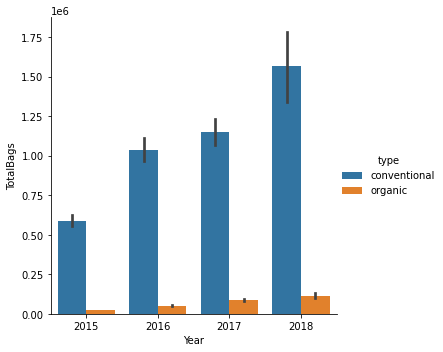

In [116]:
sb.catplot(x='Year',y='TotalBags',hue='type',kind='bar',data=Avocado)

In [117]:
AvocadoYearTypePivot=Avocado.pivot_table(values='TotalBags',index='Year',columns='type')

In [59]:
AvocadoYearTypePivot.head()

type,conventional,organic
Year,,
2015,119560.816378,3358.965030
2016,230162.555962,10597.658474
2017,251220.705405,16231.261436
2018,328095.470503,21510.808247


In [118]:
#Seems like people don't really buy organic avocados. Let's look at the average price per unit for each type. 
Avocado.groupby('type')['AveragePricePerUnit'].mean() #organic is a bit more expensive. almost 50 cents more 

type
conventional    1.142122
organic         1.627041
Name: AveragePricePerUnit, dtype: float64

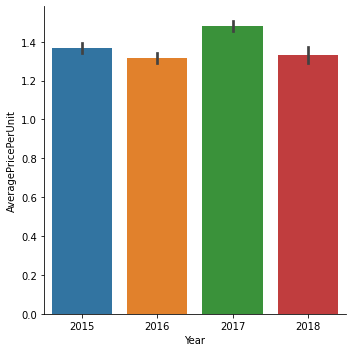

In [119]:
#Did the average price per avocado change over the years? 
sb.catplot(x='Year',y='AveragePricePerUnit',kind='bar',data=Avocado)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

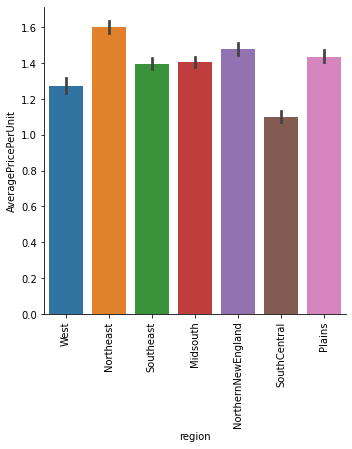

In [121]:
#plot of Avocado average per unit price -- by region 
sb.catplot(x='region',y='AveragePricePerUnit',kind='bar',data=Avocado)
plt.xticks(rotation=90)

In [123]:
#average price per region table : include, year 

AvgRegionYear=Avocado.pivot_table(values='AveragePricePerUnit',index='region',columns='Year')
AvgRegionYear

Year,2015,2016,2017,2018
region,,,,
Midsouth,1.351346,1.350865,1.520566,1.358333
Northeast,1.543750,1.595673,1.694057,1.474167
NorthernNewEngland,1.473365,1.392692,1.577170,1.421250
Plains,1.437885,1.377500,1.510472,1.359583
SouthCentral,1.112019,1.026923,1.162830,1.104583
Southeast,1.414712,1.286923,1.512170,1.302917
West,1.237788,1.180865,1.390000,1.297083


In [128]:
#Write a function to plot the sum of bags sold by region for a particular year ...make sure the plot sorts from least to greatest 
#function takes column as input as well as year as input. 

def AvoYear(col,YY):
  AvocadoYear=Avocado[Avocado['Year']==YY]
  AvocadoYearRegion=AvocadoYear.groupby('region')[col].sum().reset_index()
  AvocadoYearRegion=AvocadoYearRegion.sort_values(col)
  sb.catplot(x='region',y=col,kind='bar',data=AvocadoYearRegion)
  plt.xticks(rotation=90)


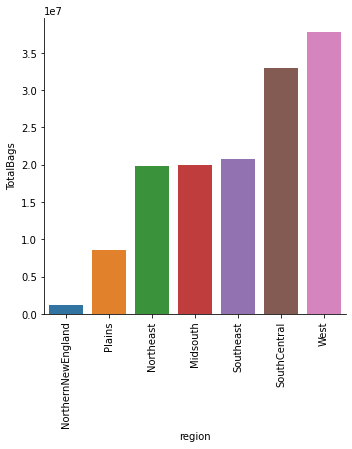

In [129]:
AvoYear('TotalBags',2018)

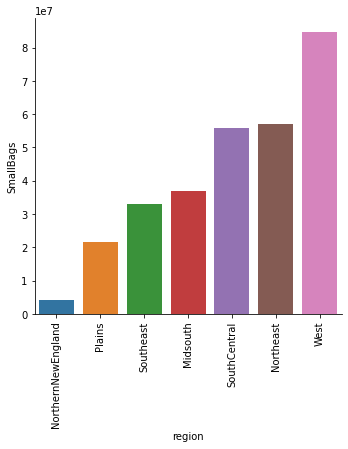

In [130]:
AvoYear('SmallBags',2016)